In [ ]:
import pandas as pd

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Lab 2 - CDP/train.csv")
train

,id,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,zero_crossing_rate_mean,zero_crossing_rate_var,harmony_mean,harmony_var,tempo,mfcc1_mean,mfcc1_var,mfcc2_mean,mfcc2_var,mfcc3_mean,mfcc3_var,mfcc4_mean,mfcc4_var,mfcc5_mean,mfcc5_var,mfcc6_mean,mfcc6_var,mfcc7_mean,mfcc7_var,mfcc8_mean,mfcc8_var,mfcc9_mean,mfcc9_var,mfcc10_mean,mfcc10_var,mfcc11_mean,mfcc11_var,mfcc12_mean,mfcc12_var,mfcc13_mean,mfcc13_var,mfcc14_mean,mfcc14_var,mfcc15_mean,mfcc15_var,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,b5524775-735d-4ddc-a904-ecc5f9d019d9,661504,0.389325,0.093108,0.129168,0.002650,1628.979106,3.352372e+05,1886.163413,148036.103870,3258.166815,1.427526e+06,0.067088,0.001280,-1.177453e-07,0.009712,161.499023,-147.055542,3531.701416,120.133255,954.171875,-21.609074,429.757721,39.656715,337.146118,6.932242,177.527161,15.089685,166.694565,-1.023989,195.281754,15.946127,121.484131,2.536824,127.316437,4.493649,118.529610,0.004241,109.783615,4.329550,95.853233,4.640450,68.307106,4.003618,47.995892,3.051005,63.217888,0.540345,56.122974,-6.144569,48.672592,-1.664157,63.187698,-0.732855,48.733318,0.191955,42.880890,reggae
1,74f3a66c-2930-443f-91bb-f33f6b3c566b,661794,0.420887,0.083129,0.145182,0.005707,2606.215652,4.084231e+05,2534.066066,126744.321565,5354.847976,1.544841e+06,0.126427,0.002427,-1.323979e-06,0.006649,135.999178,-78.277023,2617.585449,80.055191,639.930603,-9.142083,284.192688,25.457935,279.743591,-3.383608,173.832138,16.801830,84.892799,7.257556,135.880142,1.810982,98.648155,0.487986,98.190941,6.317307,64.144791,1.495706,66.588562,2.165105,60.284115,0.658274,61.267754,-3.378358,62.692139,-0.912478,69.574867,2.935873,64.119682,-0.634741,71.435364,5.868361,85.957817,1.895650,70.370834,-0.606338,74.883347,disco
2,a36e6ed4-6241-444e-88b1-98159cdd5fea,661794,0.258511,0.082287,0.009495,0.000028,1173.883591,2.379244e+04,1517.225806,15804.932551,2082.725380,1.564272e+05,0.066340,0.000420,-9.212077e-04,0.000106,123.046875,-436.858429,3777.338867,154.133224,166.645126,-19.903193,176.399490,20.182829,148.793198,3.171194,97.326416,0.461730,71.290703,-6.528067,45.328045,-4.611454,35.731201,-10.069053,58.837093,-6.159064,66.267220,-4.532597,67.620621,-2.766376,57.525570,-5.221076,58.926563,-7.373968,62.775303,-6.994014,55.305454,-3.213461,55.223270,-0.370120,61.911472,2.221201,55.450008,2.573265,113.233757,4.475615,162.262054,classical
3,18302b32-f326-4edb-bd7e-be4e29b84f8c,661504,0.465091,0.084325,0.156646,0.004200,4052.637359,1.101301e+06,3426.408610,153232.986134,8382.927603,2.380349e+06,0.210610,0.008530,-3.347512e-03,0.008654,129.199219,-52.599743,2847.775146,47.773418,482.387146,13.463850,433.845795,2.229346,174.203186,13.268142,139.078217,9.149079,81.605240,14.451733,93.625046,0.865446,86.707855,9.461862,84.276199,7.000082,88.296196,-0.690012,58.368130,1.737169,67.088661,8.502920,69.700645,6.933043,70.166634,3.174512,63.596874,2.243659,57.392250,-0.911696,56.437584,2.039834,60.173218,2.287221,81.885208,3.465456,62.379543,pop
4,6cd4579b-bcd8-4fd0-92c5-69757538dfe5,661794,0.499723,0.078196,0.151300,0.002688,1948.937530,6.541679e+05,2286.013831,279514.512627,4218.975674,3.018486e+06,0.062985,0.001948,1.266091e-06,0.015303,92.285156,-133.206665,3348.176758,93.954941,886.127991,-2.249877,673.943726,50.235905,286.783386,12.498285,206.742142,15.044655,117.474022,11.496757,150.215683,10.252985,78.842026,7.970588,63.148861,10.794733,107.833199,1.961224,51.691441,5.199101,39.193123,1.064213,39.750519,2.173512,36.735153,-1.512496,42.804100,-0.449804,36.750526,-2.464082,36.492332,-3.869461,38.315750,-1.695695,34.714657,-2.753621,36.753723,hiphop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

## Questão 1
a. correlações entre as variáveis preditoras;

b. distribuição das variáveis; e

c. valores ausentes.

In [ ]:
correlacao = train.corr(method='pearson')

In [ ]:
correlacao = correlacao[(correlacao > 0.70) | (correlacao < -0.70)].fillna(0) ## só vamos procurar por valores que tenham valores de correlação maiores que 0.7
correlacao.style.background_gradient(cmap='coolwarm')

---
### Sobre a correlação entre as colunas
- Não vou levar em consideração as colunas do tipo "mfcc" por conta da difícil interpretação
- rms_mean e harmony_var tem forte correlação positiva, músicas mais harmoniosas têm maior volumosidade possivelmente
- spectral_centroid_mean tem forte correlação positiva com spectral_bandwidth_mean. Intrumentos com timbres mais graves produzem sons mais graves por isso a forte correlação com spectral_bandwitdth.
    - Também teve forte correlação com rolloff_mean e zero_crossing_rate_mean, indicando, i.e., instrumentos de timbres mais graves fortemente relacionados à concentração de energia em uma dada faixa e a continuidade do som.
- spectral_centroid_var teve forte correlação com rolloff_var e zero_crossing_rate_var pode seguir a mesma interpretação do caso anterior
- spectral_bandwidth fortemente correlacionado ao rolloff, sons agudos ou graves estao relacionados à concentração da energia da música em uma dada frequência.


---
### Valores ausentes

In [ ]:
train.isnull().values.any()

False

- Não há valores ausentes

---
### Distribuição das variáveis
- Aparentemente todas as variáveis seguem distribuição normal, exceto label que segue distribuição uniforme.
- Algumas distribuições são bastante assimétricas, geralmente com inclinação para a esquerda
    - mfcc1_mean, harmony_mean e chroma_stft_var estão inclinadas à direita
- Outras distribuições seguem distribuição normal não exatamente simétricas, mas quase simétricas.

In [ ]:
import matplotlib.pyplot as plt

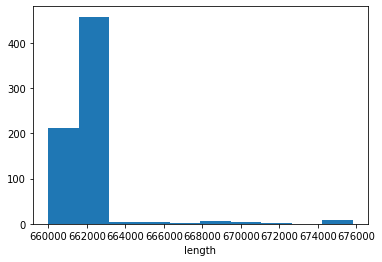

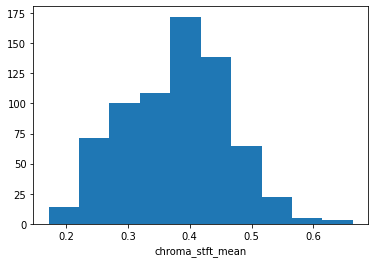

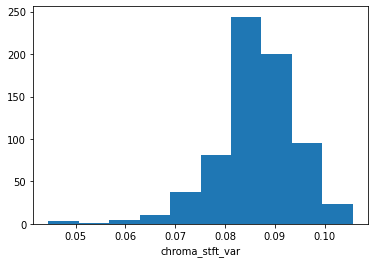

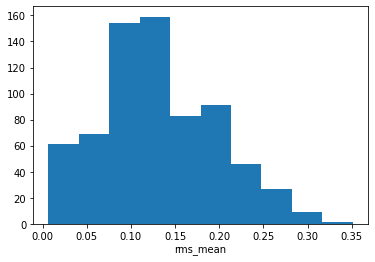

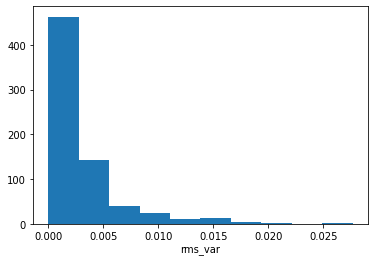

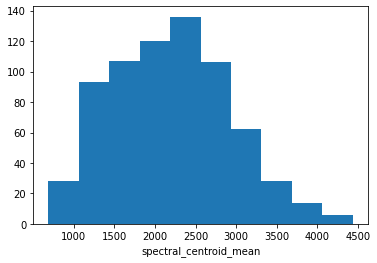

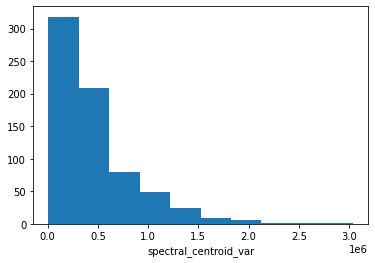

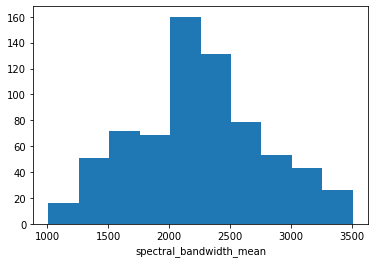

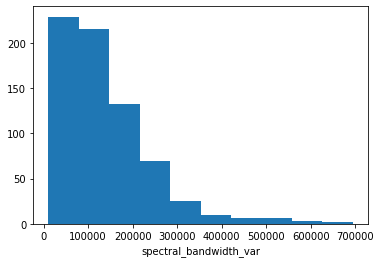

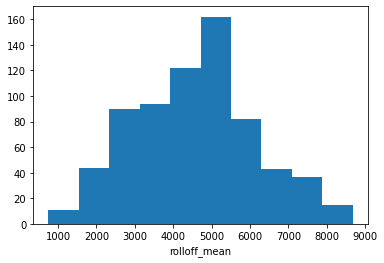

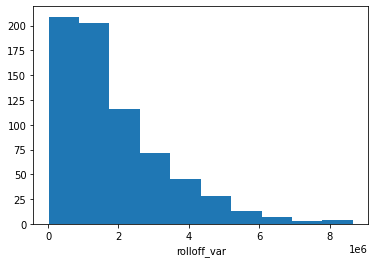

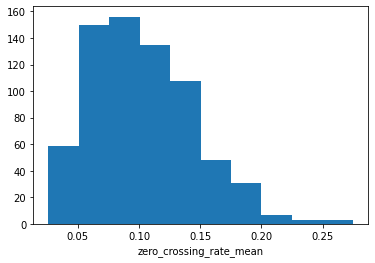

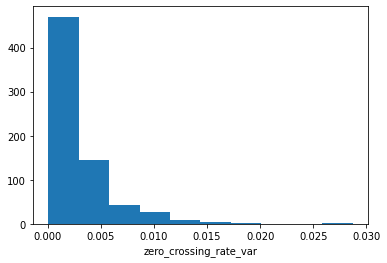

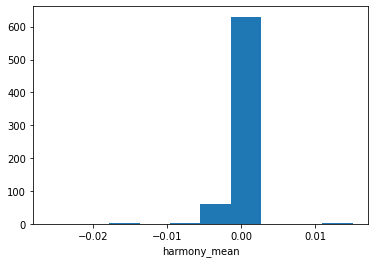

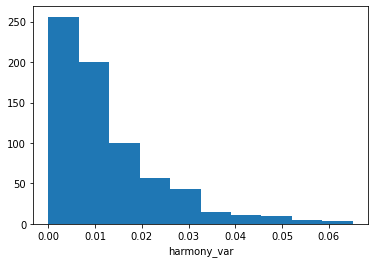

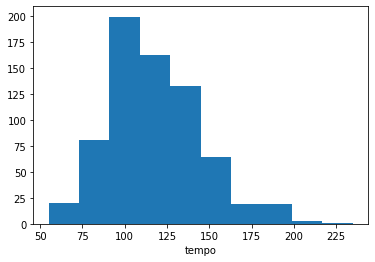

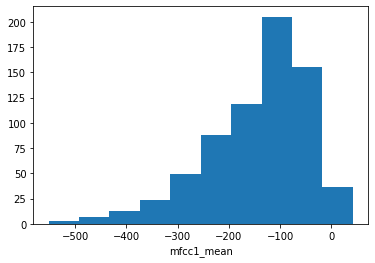

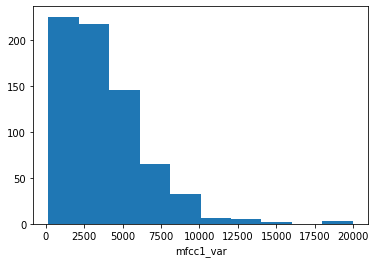

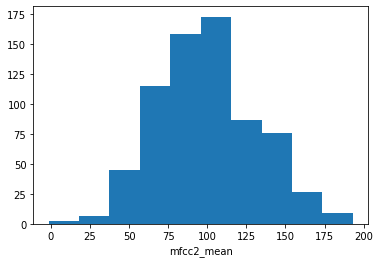

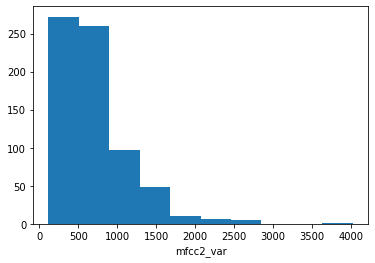

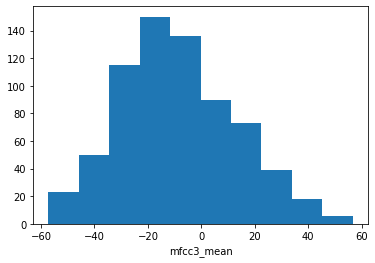

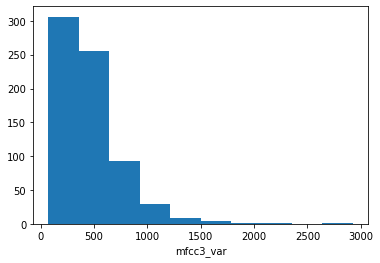

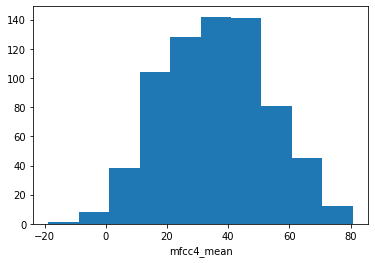

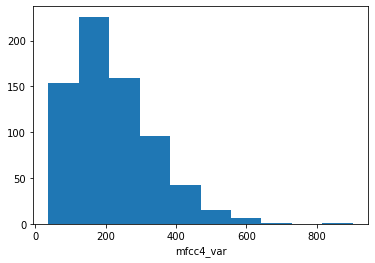

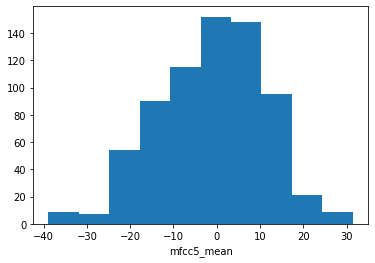

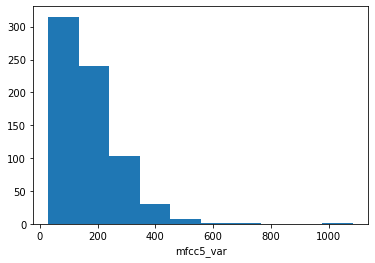

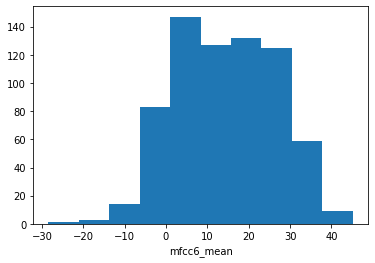

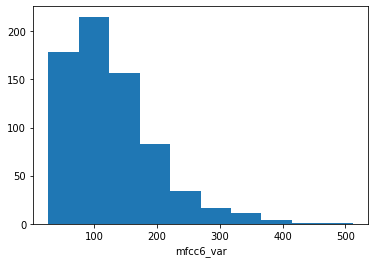

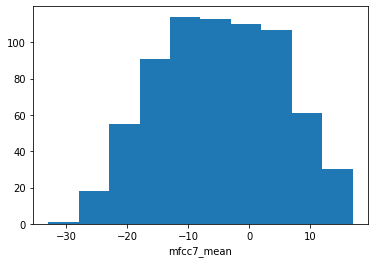

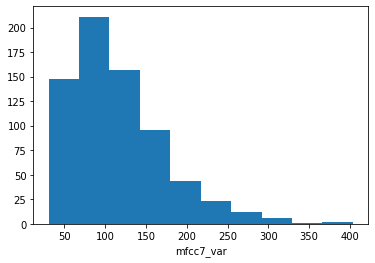

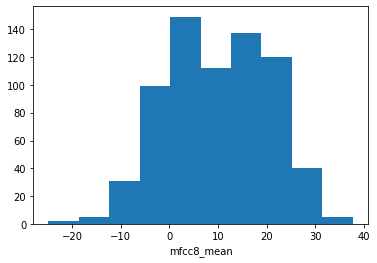

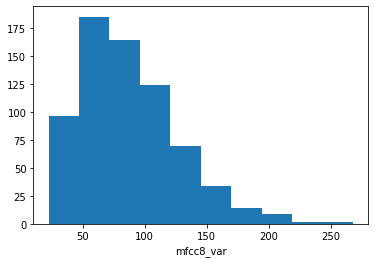

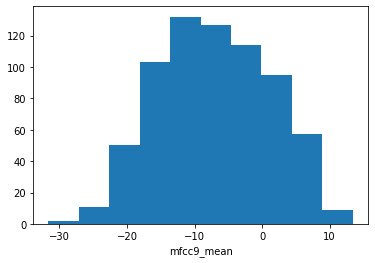

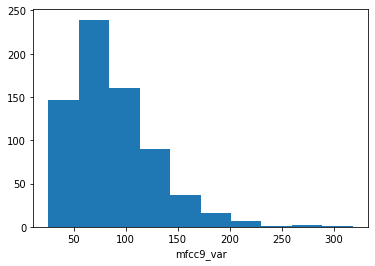

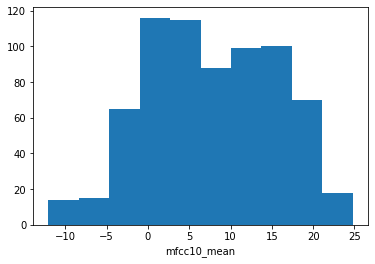

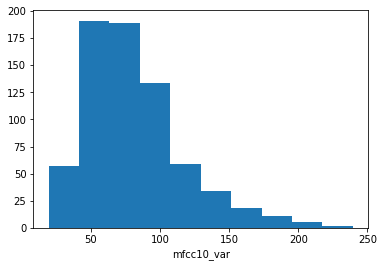

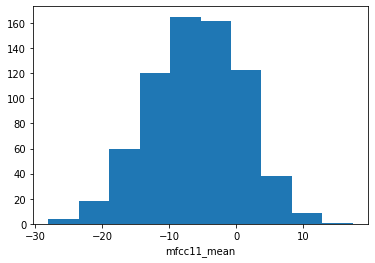

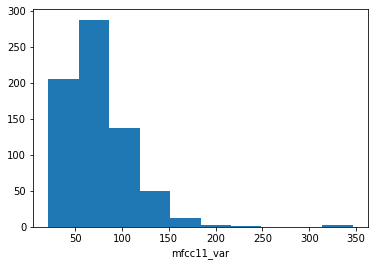

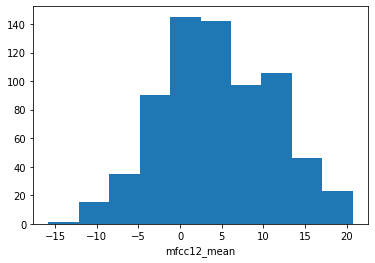

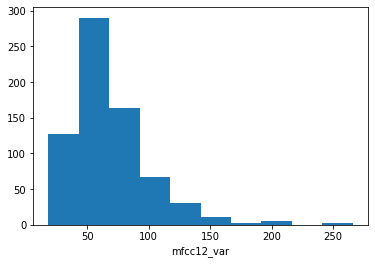

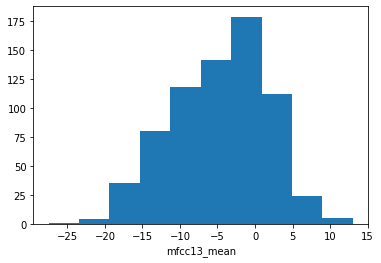

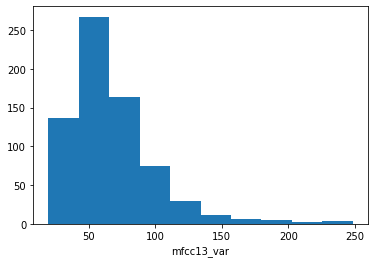

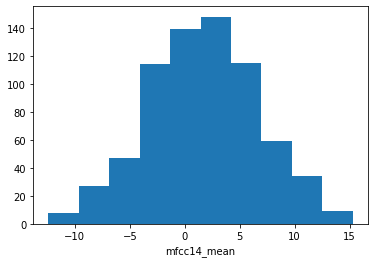

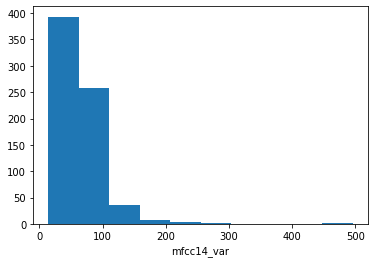

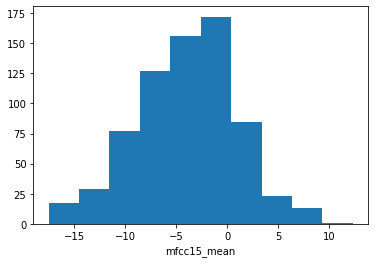

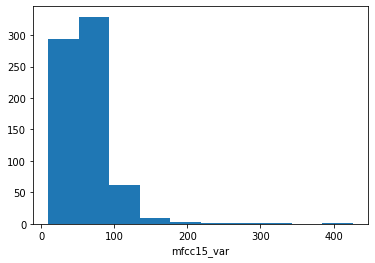

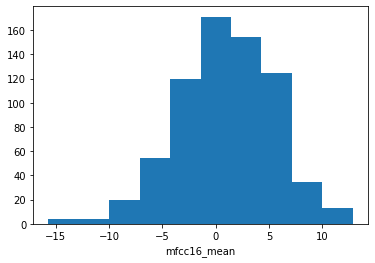

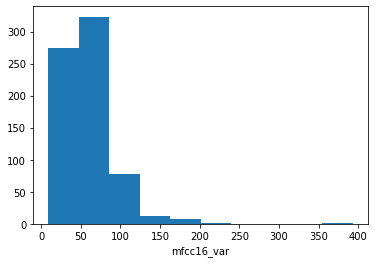

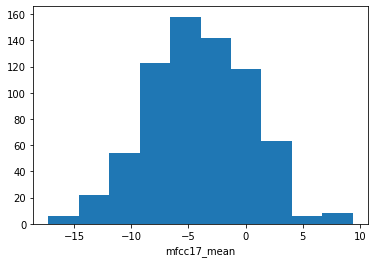

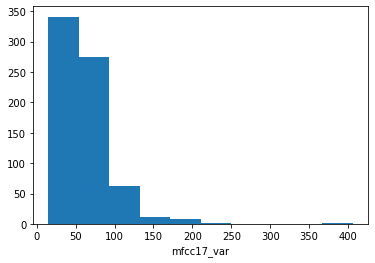

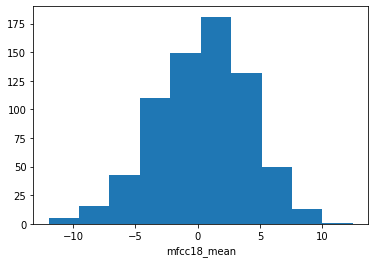

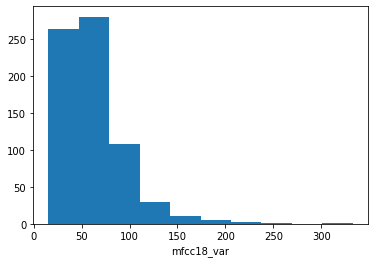

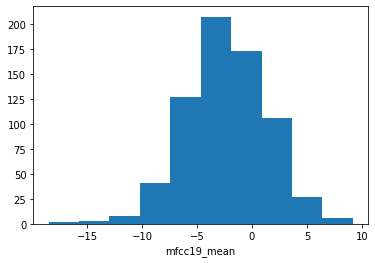

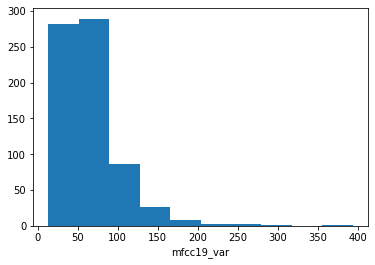

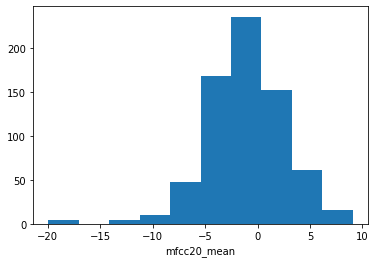

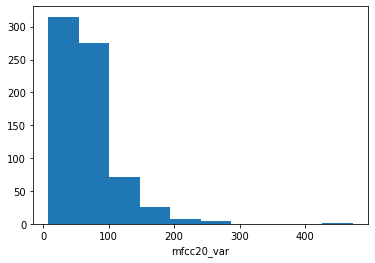

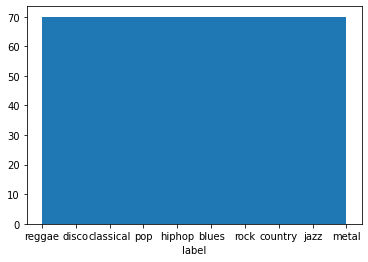

In [ ]:
t = len(train.columns)
for i in range(1,t):
    plt.hist(data=train, x=train.columns[i])
    plt.xlabel(train.columns[i])
    plt.show()

---
## Questão 2
- Dividir o DF em treino e validação

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = train.drop(columns=["id","label"])
y = train["label"].copy()
u = y.unique()
dic = {i: u[i] for i in range(len(u))}

for i in range(len(u)):
    y.replace(dic[i], i, inplace=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

---
- Modelo de Regressão Logística

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [ ]:
regr = LogisticRegression(random_state=0)
param = {'solver':('newton-cg', 'lbfgs', 'sag'), 'C':[0.001, 0.1, 1, 2, 5], 'max_iter':[2000]}
grid_search = GridSearchCV(regr, param, cv=5)

In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=0, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.1, 1, 2, 5], 'max_iter': [2000],
                         'solver': ('newton-cg', 'lbfgs', 'sag')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
grid_search.best_params_

{'C': 0.1, 'max_iter': 2000, 'solver': 'newton-cg'}

In [ ]:
regr = LogisticRegression(random_state=0, C=0.1, solver="newton-cg", max_iter=2000).fit(X_train, y_train)
regr.predict(X_test)

array([8, 3, 5, 7, 8, 6, 2, 6, 0, 9, 8, 5, 0, 9, 7, 2, 8, 9, 4, 3, 5, 0,
       4, 8, 7, 5, 2, 6, 3, 6, 3, 4, 6, 0, 9, 3, 4, 7, 6, 4, 9, 6, 5, 5,
       8, 2, 7, 2, 8, 3, 3, 2, 3, 6, 2, 7, 6, 8, 1, 8, 2, 2, 6, 9, 2, 9,
       0, 9, 9, 2, 6, 1, 8, 6, 3, 0, 4, 8, 5, 0, 3, 9, 5, 3, 1, 9, 7, 5,
       2, 7, 3, 9, 6, 7, 5, 3, 9, 4, 0, 7, 2, 1, 8, 0, 5, 4, 5, 9, 1, 9,
       8, 8, 9, 1, 2, 9, 7, 9, 8, 0, 3, 8, 9, 5, 9, 5, 7, 1, 3, 1, 7, 9,
       3, 4, 2, 6, 0, 1, 0, 6])

In [ ]:
regr.score(X_test, y_test)

0.6857142857142857

---
- Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [ ]:
param = {'var_smoothing': [1e-9, 1e-5, 0.01, 0.1]}
grid_search = GridSearchCV(nb, param, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=GaussianNB(priors=None, var_smoothing=1e-09),
             iid='deprecated', n_jobs=None,
             param_grid={'var_smoothing': [1e-09, 1e-05, 0.01, 0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
grid_search.best_params_

{'var_smoothing': 1e-05}

In [ ]:
nb = GaussianNB(var_smoothing=1e-5).fit(X_train,y_train)
nb.predict(X_test)

array([0, 3, 5, 5, 1, 6, 2, 1, 0, 9, 7, 5, 0, 9, 0, 2, 8, 9, 4, 3, 0, 0,
       0, 5, 7, 5, 8, 6, 3, 9, 3, 0, 8, 0, 9, 3, 4, 5, 5, 4, 9, 6, 1, 5,
       7, 2, 7, 2, 7, 1, 3, 2, 3, 5, 2, 7, 5, 8, 9, 5, 2, 2, 0, 1, 2, 9,
       0, 9, 9, 2, 0, 9, 2, 9, 1, 7, 4, 1, 5, 0, 3, 9, 5, 1, 9, 9, 7, 5,
       2, 5, 3, 9, 6, 7, 8, 3, 9, 4, 7, 7, 2, 1, 8, 0, 9, 0, 9, 9, 1, 9,
       5, 1, 9, 1, 2, 9, 7, 9, 8, 0, 3, 1, 9, 0, 9, 9, 7, 1, 3, 1, 7, 9,
       3, 4, 2, 5, 0, 4, 0, 8])

In [ ]:
nb.score(X_test,y_test)

0.5285714285714286

---
- Classificador Árvore de Decisão

In [ ]:
from sklearn.tree import DecisionTreeClassifier
d_tree = DecisionTreeClassifier(random_state=0)

In [ ]:
param = {"criterion": ["gini", "entropy"], "splitter": ["best","random"], "max_features": ["auto","sqrt","log2"], "max_depth": [1,2,5,7,10,25,50,100,500,1000]}
grid_search = GridSearchCV(d_tree, param, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 5, 7, 10, 25, 50, 100, 

In [ ]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'auto',
 'splitter': 'best'}

In [ ]:
d_tree = DecisionTreeClassifier(random_state=0,criterion='entropy',max_depth=10,max_features='auto',splitter='best').fit(X_train,y_train)
d_tree.predict(X_test)

array([8, 3, 7, 4, 6, 1, 7, 1, 0, 5, 9, 0, 4, 5, 4, 2, 8, 9, 4, 4, 0, 5,
       6, 8, 7, 5, 7, 0, 3, 5, 3, 0, 9, 0, 9, 3, 6, 7, 9, 4, 9, 1, 9, 5,
       2, 8, 8, 2, 8, 0, 0, 2, 3, 2, 2, 7, 6, 8, 7, 2, 2, 5, 1, 4, 2, 9,
       1, 4, 4, 2, 0, 6, 2, 1, 6, 7, 7, 8, 2, 0, 3, 1, 7, 1, 6, 9, 8, 5,
       2, 5, 3, 9, 5, 6, 3, 3, 1, 4, 0, 7, 2, 8, 2, 8, 9, 4, 9, 9, 6, 9,
       8, 8, 4, 1, 5, 4, 8, 9, 8, 4, 3, 4, 9, 1, 1, 9, 0, 9, 3, 6, 8, 9,
       3, 4, 2, 4, 0, 1, 0, 7])

In [ ]:
d_tree.score(X_test,y_test)

0.5428571428571428

---
- Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(max_depth=5, random_state=0)

In [ ]:
param = {"n_estimators": [5,10,30,60,100],"criterion": ["gini", "entropy"], "max_features": ["auto","sqrt","log2"], "max_depth": [1,2,5,7,10,25,50,100,500,1000]}
grid_search = GridSearchCV(forest, param, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=5,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                      

In [ ]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'auto',
 'n_estimators': 100}

In [ ]:
forest = RandomForestClassifier(max_depth=10, random_state=0, criterion='gini', max_features='auto', n_estimators=100).fit(X_train, y_train)
forest.predict(X_test)

array([8, 3, 7, 5, 6, 1, 2, 1, 0, 9, 0, 7, 0, 9, 0, 2, 8, 9, 4, 3, 0, 0,
       0, 8, 7, 5, 8, 0, 3, 6, 3, 4, 9, 0, 9, 3, 4, 7, 9, 4, 9, 1, 1, 5,
       8, 8, 7, 2, 8, 1, 3, 2, 3, 7, 2, 7, 6, 8, 5, 8, 2, 2, 1, 4, 2, 9,
       0, 9, 9, 2, 8, 6, 2, 6, 3, 0, 1, 8, 7, 0, 3, 9, 5, 1, 6, 9, 7, 5,
       2, 7, 3, 9, 6, 7, 3, 3, 9, 4, 0, 7, 2, 6, 2, 0, 4, 4, 5, 9, 6, 9,
       8, 8, 9, 1, 2, 9, 7, 9, 8, 1, 3, 8, 6, 1, 9, 1, 0, 0, 3, 6, 7, 9,
       3, 4, 2, 5, 0, 1, 0, 7])

In [ ]:
forest.score(X_test, y_test)

0.7357142857142858

---
## Questão 3
Precision, Recall, Acurácia e F1-Score

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
target_names = [dic[i] for i in range(len(dic))]

#### Random Forest 
- Aparentemente o modelo teve overfitting no treino pois quase todas as predições foram exatas, mas se saiu bem com os dados de teste.

In [ ]:
print(classification_report(y_train, forest.predict(X_train), target_names=target_names))

              precision    recall  f1-score   support

      reggae       1.00      1.00      1.00        58
       disco       1.00      1.00      1.00        59
   classical       1.00      1.00      1.00        58
         pop       1.00      1.00      1.00        53
      hiphop       1.00      1.00      1.00        54
       blues       1.00      1.00      1.00        62
        rock       1.00      0.98      0.99        58
     country       1.00      1.00      1.00        55
        jazz       1.00      1.00      1.00        52
       metal       0.98      1.00      0.99        51

    accuracy                           1.00       560
   macro avg       1.00      1.00      1.00       560
weighted avg       1.00      1.00      1.00       560



In [ ]:
print(classification_report(y_test, forest.predict(X_test), target_names=target_names))

              precision    recall  f1-score   support

      reggae       0.61      0.92      0.73        12
       disco       0.62      0.73      0.67        11
   classical       0.73      0.92      0.81        12
         pop       0.93      0.82      0.87        17
      hiphop       0.89      0.50      0.64        16
       blues       0.50      0.50      0.50         8
        rock       0.64      0.58      0.61        12
     country       0.67      0.67      0.67        15
        jazz       0.80      0.67      0.73        18
       metal       0.86      0.95      0.90        19

    accuracy                           0.74       140
   macro avg       0.72      0.72      0.71       140
weighted avg       0.75      0.74      0.73       140



---
#### Decision Tree
- Da mesma forma, as predições no treino foram exatas ou quase, pois o modelo aprendeu exatamente qual a resposta certa das entradas
- Com os dados de teste, a predição n foi tao boa, a média do f1-score das labels foi mais ou menos 50%

In [ ]:
print(classification_report(y_train, d_tree.predict(X_train), target_names=target_names))

              precision    recall  f1-score   support

      reggae       1.00      1.00      1.00        58
       disco       0.98      0.97      0.97        59
   classical       1.00      1.00      1.00        58
         pop       1.00      1.00      1.00        53
      hiphop       1.00      1.00      1.00        54
       blues       1.00      0.95      0.98        62
        rock       0.98      0.95      0.96        58
     country       0.90      1.00      0.95        55
        jazz       0.98      1.00      0.99        52
       metal       1.00      0.98      0.99        51

    accuracy                           0.98       560
   macro avg       0.98      0.98      0.98       560
weighted avg       0.98      0.98      0.98       560



In [ ]:
print(classification_report(y_test, d_tree.predict(X_test), target_names=target_names))

              precision    recall  f1-score   support

      reggae       0.50      0.58      0.54        12
       disco       0.46      0.55      0.50        11
   classical       0.62      0.83      0.71        12
         pop       1.00      0.71      0.83        17
      hiphop       0.47      0.50      0.48        16
       blues       0.36      0.50      0.42         8
        rock       0.30      0.25      0.27        12
     country       0.42      0.33      0.37        15
        jazz       0.62      0.56      0.59        18
       metal       0.58      0.58      0.58        19

    accuracy                           0.54       140
   macro avg       0.53      0.54      0.53       140
weighted avg       0.56      0.54      0.54       140



---
#### Naive Bayes
- Os resultados dos dados de treino e dos dados de teste foram bem semelhantes, porém ligeiramente melhores com os dados de treino
- Isso pode ser porque tem bem mais dados de treino do que de teste, pode ter influenciado positivamente.

In [ ]:
print(classification_report(y_train, nb.predict(X_train), target_names=target_names))

              precision    recall  f1-score   support

      reggae       0.60      0.55      0.58        58
       disco       0.46      0.61      0.53        59
   classical       0.88      0.91      0.90        58
         pop       0.79      0.83      0.81        53
      hiphop       0.81      0.39      0.53        54
       blues       0.49      0.65      0.56        62
        rock       0.37      0.12      0.18        58
     country       0.66      0.69      0.67        55
        jazz       0.79      0.50      0.61        52
       metal       0.48      0.90      0.63        51

    accuracy                           0.61       560
   macro avg       0.63      0.62      0.60       560
weighted avg       0.63      0.61      0.60       560



In [ ]:
print(classification_report(y_test, nb.predict(X_test), target_names=target_names))

              precision    recall  f1-score   support

      reggae       0.37      0.58      0.45        12
       disco       0.27      0.36      0.31        11
   classical       0.73      0.92      0.81        12
         pop       1.00      0.76      0.87        17
      hiphop       0.86      0.38      0.52        16
       blues       0.24      0.50      0.32         8
        rock       0.25      0.08      0.12        12
     country       0.50      0.47      0.48        15
        jazz       0.50      0.22      0.31        18
       metal       0.61      0.89      0.72        19

    accuracy                           0.53       140
   macro avg       0.53      0.52      0.49       140
weighted avg       0.57      0.53      0.52       140



#### Regressão Logística
- Da mesma forma que o naive bayes, os resultados da regressão logistica para os dados de treino e de teste foram semelhantes porém ligeiramente melhores no treino.
- Minha ideia do maior volume de dados do treino ter influenciado positivamente nos resultados permanece.

In [ ]:
print(classification_report(y_train, regr.predict(X_train), target_names=target_names))

              precision    recall  f1-score   support

      reggae       0.77      0.79      0.78        58
       disco       0.72      0.69      0.71        59
   classical       0.97      0.97      0.97        58
         pop       0.91      0.92      0.92        53
      hiphop       0.84      0.76      0.80        54
       blues       0.78      0.84      0.81        62
        rock       0.71      0.59      0.64        58
     country       0.83      0.78      0.80        55
        jazz       0.86      0.94      0.90        52
       metal       0.83      0.94      0.88        51

    accuracy                           0.82       560
   macro avg       0.82      0.82      0.82       560
weighted avg       0.82      0.82      0.82       560



In [ ]:
print(classification_report(y_test, regr.predict(X_test), target_names=target_names))

              precision    recall  f1-score   support

      reggae       0.67      0.67      0.67        12
       disco       0.33      0.27      0.30        11
   classical       0.73      0.92      0.81        12
         pop       0.88      0.82      0.85        17
      hiphop       1.00      0.56      0.72        16
       blues       0.36      0.62      0.45         8
        rock       0.40      0.50      0.44        12
     country       0.69      0.60      0.64        15
        jazz       0.88      0.78      0.82        18
       metal       0.81      0.89      0.85        19

    accuracy                           0.69       140
   macro avg       0.67      0.66      0.66       140
weighted avg       0.72      0.69      0.69       140



---
## Questão 4

In [ ]:
X = train.drop(columns=["id","label"])
y = train["label"].copy()
u = y.unique()
dic = {i: u[i] for i in range(len(u))}

for i in range(len(u)):
    y.replace(dic[i], i, inplace=True)

In [ ]:
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Lab 2 - CDP/test.csv")
test.columns

Index(['id', 'length', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean',
       'rms_var', 'spectral_centroid_mean', 'spectral_centroid_var',
       'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean',
       'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var',
       'harmony_mean', 'harmony_var', 'tempo', 'mfcc1_mean', 'mfcc1_var',
       'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean', 'mfcc3_var', 'mfcc4_mean',
       'mfcc4_var', 'mfcc5_mean', 'mfcc5_var', 'mfcc6_mean', 'mfcc6_var',
       'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean', 'mfcc8_var', 'mfcc9_mean',
       'mfcc9_var', 'mfcc10_mean', 'mfcc10_var', 'mfcc11_mean', 'mfcc11_var',
       'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean', 'mfcc13_var', 'mfcc14_mean',
       'mfcc14_var', 'mfcc15_mean', 'mfcc15_var', 'mfcc16_mean', 'mfcc16_var',
       'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean', 'mfcc18_var', 'mfcc19_mean',
       'mfcc19_var', 'mfcc20_mean', 'mfcc20_var'],
      dtype='object')

In [ ]:
X_test = test.drop(columns=["id"])

In [ ]:
scaler2 = StandardScaler()
scaler2.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
X_test = scaler2.transform(X_test)
X = scaler2.transform(X)

In [ ]:
forest2 = RandomForestClassifier(max_depth=10, random_state=0, criterion='gini', max_features='auto', n_estimators=100).fit(X,y)

In [ ]:
y_pred = forest2.predict(X_test)
y_pred

array([7, 7, 8, 7, 9, 2, 8, 7, 3, 3, 5, 0, 7, 7, 8, 4, 1, 2, 8, 7, 5, 4,
       7, 1, 3, 6, 8, 0, 2, 5, 0, 4, 8, 3, 5, 1, 8, 2, 3, 2, 1, 6, 8, 3,
       1, 2, 0, 1, 0, 6, 6, 4, 8, 5, 6, 1, 0, 6, 0, 9, 8, 1, 4, 9, 1, 8,
       7, 5, 5, 8, 9, 0, 0, 4, 1, 8, 0, 3, 4, 0, 3, 3, 9, 2, 3, 8, 3, 3,
       2, 6, 3, 3, 8, 4, 0, 1, 6, 1, 1, 1, 6, 4, 4, 1, 5, 3, 5, 7, 8, 4,
       3, 6, 9, 2, 4, 2, 4, 6, 5, 3, 7, 5, 1, 0, 7, 1, 0, 0, 2, 3, 5, 7,
       4, 7, 4, 6, 3, 5, 3, 7, 7, 2, 6, 1, 2, 4, 0, 7, 3, 2, 3, 7, 8, 2,
       6, 3, 0, 3, 7, 5, 2, 8, 5, 5, 6, 9, 7, 5, 7, 3, 9, 9, 4, 2, 4, 8,
       8, 6, 6, 0, 1, 8, 9, 3, 8, 8, 0, 9, 8, 4, 3, 5, 9, 3, 1, 9, 5, 1,
       9, 1, 1, 7, 1, 0, 7, 7, 7, 1, 4, 4, 9, 5, 4, 9, 8, 2, 2, 6, 7, 0,
       0, 1, 5, 7, 2, 9, 5, 7, 1, 4, 4, 9, 0, 6, 0, 0, 7, 6, 2, 3, 4, 7,
       8, 1, 1, 1, 9, 0, 0, 9, 6, 8, 2, 7, 6, 6, 4, 5, 6, 0, 5, 5, 9, 5,
       2, 9, 1, 0, 5, 2, 5, 5, 2, 2, 2, 0, 8, 1, 9, 1, 7, 2, 4, 1, 4, 8,
       4, 5, 0, 9, 0, 6, 1, 8, 9, 0, 9, 2, 7, 7])

In [ ]:
dic

{0: 'reggae',
 1: 'disco',
 2: 'classical',
 3: 'pop',
 4: 'hiphop',
 5: 'blues',
 6: 'rock',
 7: 'country',
 8: 'jazz',
 9: 'metal'}

In [ ]:
y_pred = pd.Series(y_pred)
y_pred.replace(dic, inplace=True)
y_pred

0        country
1        country
2           jazz
3        country
4          metal
         ...    
295       reggae
296        metal
297    classical
298      country
299      country
Length: 300, dtype: object

In [ ]:
submissao = pd.DataFrame(data={"id": test['id'], "label": y_pred})
submissao.groupby(["label"]).count()

,id
label,
blues,30
classical,29
country,34
disco,35
hiphop,29
jazz,30
metal,26
pop,29
reggae,33


In [ ]:
submissao.to_csv("/content/drive/MyDrive/Colab Notebooks/Lab 2 - CDP/submissao.csv", header=True, index=False)